<img src="2015.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reservoir_data=pd.read_csv("/....../chennai_reservoir_levels.csv")
rainfall_in_reservoir=pd.read_csv("/......./chennai_reservoir_rainfall.csv")

In [3]:
reservoir_data.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [4]:
reservoir_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null object
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [5]:
rainfall_in_reservoir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
Date               5647 non-null object
POONDI             5647 non-null float64
CHOLAVARAM         5647 non-null float64
REDHILLS           5647 non-null float64
CHEMBARAMBAKKAM    5647 non-null float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [6]:
reservoir_data.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,1133.272203,240.020572,1568.345573,1321.381645
std,1026.009311,274.601731,890.363617,957.057834
min,0.900000,0.000000,0.000000,0.000000
25%,213.000000,22.300000,849.000000,471.500000
50%,782.000000,92.000000,1630.000000,1225.000000
75%,2006.000000,460.000000,2236.000000,2083.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [7]:
rainfall_in_reservoir.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862
std,12.755029,14.078840,15.060551,16.287227
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


In [8]:
reservoir_data.corr()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
POONDI,1.000000,0.833263,0.806738,0.885496
CHOLAVARAM,0.833263,1.000000,0.758682,0.811611
REDHILLS,0.806738,0.758682,1.000000,0.862584
CHEMBARAMBAKKAM,0.885496,0.811611,0.862584,1.000000


In [9]:
rainfall_in_reservoir.corr()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
POONDI,1.000000,0.711964,0.712009,0.684963
CHOLAVARAM,0.711964,1.000000,0.904036,0.745151
REDHILLS,0.712009,0.904036,1.000000,0.783919
CHEMBARAMBAKKAM,0.684963,0.745151,0.783919,1.000000


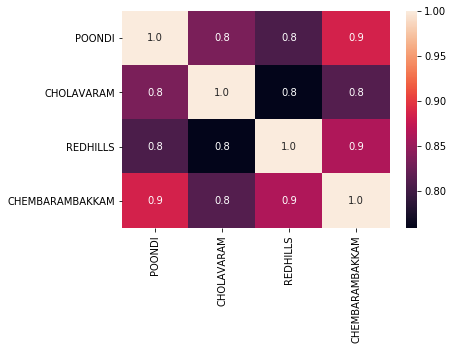

In [10]:
sns.heatmap(reservoir_data.corr(), annot=True, fmt=".1f")
plt.show()

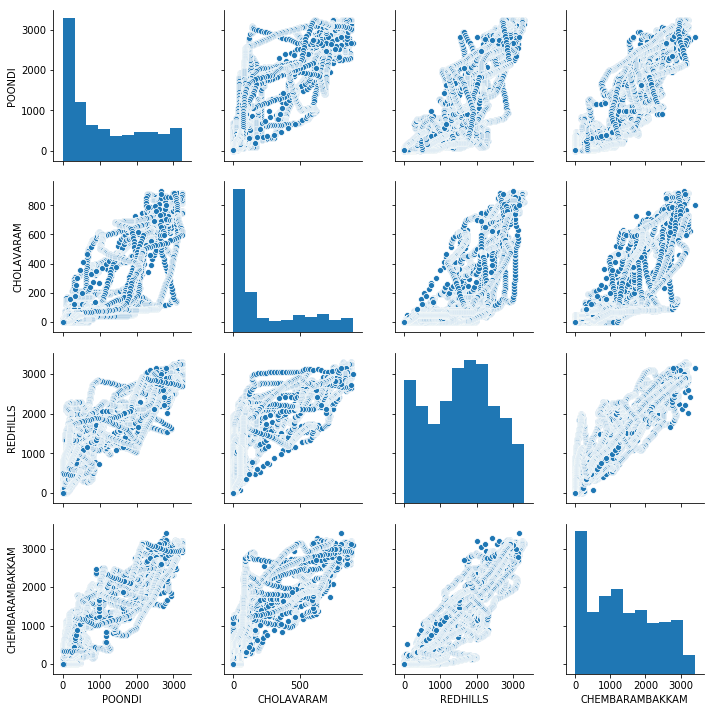

In [11]:
sns.pairplot(reservoir_data)

In [12]:
#.str.strip() to remove the extra whitespace before converting. 

In [13]:
reservoir_data['Date']=pd.to_datetime(reservoir_data['Date'].str.strip(), format='%d-%m-%Y')

In [14]:
rainfall_in_reservoir['Date']=pd.to_datetime(rainfall_in_reservoir['Date'].str.strip(), format='%d-%m-%Y')

In [15]:
reservoir_data.head(3)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0


In [16]:
#water_level['Year'] = water_level.Date.dt.year
#water_level['Month'] = water_level.Date.dt.month
reservoir_data['MONTH']=reservoir_data.Date.dt.month
reservoir_data['YEAR']=reservoir_data.Date.dt.year

In [17]:
rainfall_in_reservoir['MONTH']=reservoir_data.Date.dt.month
rainfall_in_reservoir['YEAR']=reservoir_data.Date.dt.year

In [18]:
reservoir_data.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,MONTH,YEAR
0,2004-01-01,3.9,0.0,268.0,0.0,1,2004
1,2004-01-02,3.9,0.0,268.0,0.0,1,2004
2,2004-01-03,3.9,0.0,267.0,0.0,1,2004
3,2004-01-04,3.9,0.0,267.0,0.0,1,2004
4,2004-01-05,3.8,0.0,267.0,0.0,1,2004


In [19]:
reservoir_data.MONTH.replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)

In [20]:
rainfall_in_reservoir.MONTH.replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace = True)

In [21]:
data1=reservoir_data.groupby('YEAR').mean()

In [22]:
data2=rainfall_in_reservoir.groupby('YEAR').sum()

In [31]:
np.corrcoef(data1['POONDI'],data2['POONDI'])

array([[1.        , 0.19865821],
       [0.19865821, 1.        ]])

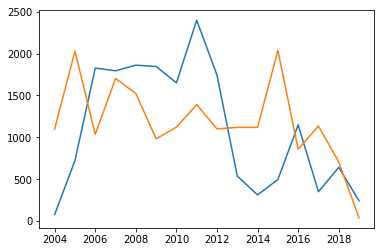

In [24]:
plt.plot(data1['POONDI'])
plt.plot(data2['POONDI'])

In [32]:
np.corrcoef(data1['CHOLAVARAM'],data2['CHOLAVARAM'])

array([[1.        , 0.26320807],
       [0.26320807, 1.        ]])

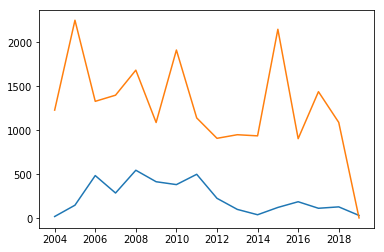

In [25]:
plt.plot(data1['CHOLAVARAM'])
plt.plot(data2['CHOLAVARAM'])

In [33]:
np.corrcoef(data1['CHEMBARAMBAKKAM'],data2['CHEMBARAMBAKKAM'])

array([[1.        , 0.30218944],
       [0.30218944, 1.        ]])

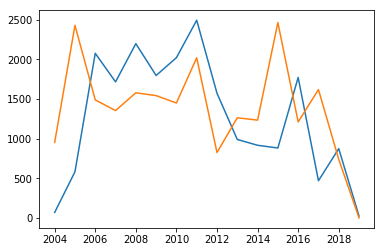

In [26]:
plt.plot(data1['CHEMBARAMBAKKAM'])
plt.plot(data2['CHEMBARAMBAKKAM'])#

In [34]:
np.corrcoef(data1['REDHILLS'],data2['REDHILLS'])

array([[1.        , 0.33119747],
       [0.33119747, 1.        ]])

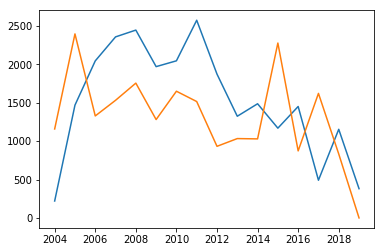

In [35]:
plt.plot(data1['REDHILLS'])
plt.plot(data2['REDHILLS'])

<img src=2019.jpg>